<a href="https://colab.research.google.com/github/vanadhia/digitalskolads11_portfolio/blob/master/HW_2_WEEK_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving healthy_lifestyle_city_2021.csv to healthy_lifestyle_city_2021.csv
User uploaded file "healthy_lifestyle_city_2021.csv" with length 3329 bytes


In [4]:
data = pd.read_csv("/content/healthy_lifestyle_city_2021.csv")
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


Here are the datasets of "Healthy Lifestyle Cities Report 2021". This taken from top 44 cities. the lifestyle metrics that we use are consist of Sunshine hours(City), Cost of a bottle of water(City), Obesity levels(Country), Life expectancy(years) (Country), Pollution(Index score) (City), Annual avg. hours worked, Happiness levels(Country), Outdoor activities(City), Number of take out places(City), and Cost of a monthly gym membership(City).

In [5]:
# Change data type
data['Sunshine hours(City)'] = data['Sunshine hours(City)'].replace(to_replace = '-', value = '0')
data['Sunshine hours(City)'] = data['Sunshine hours(City)'].astype('int64')

In [6]:
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].astype('str')
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].str[:-1]
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].astype('float')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     int64  
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     float64
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [8]:
data.isna().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

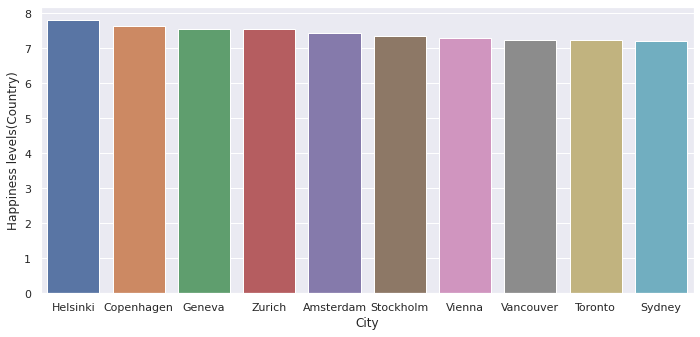

In [9]:
# Top 10 Countries with happines levels 
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.barplot(x='City', 
            y='Happiness levels(Country)',
            data=data.nlargest(10, 'Happiness levels(Country)'))

In [10]:
# Top 10 Healthiest Cities
data_top = data.iloc[0:10,:]
data_top.head(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.4,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.0,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.1,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.6,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.7,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.2,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.3,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.3,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.8,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.4,81.7,24.26,1670,7.23,218,788,£31.04


In [11]:
# Bottom 10 ranking Healthy city
data_bottom = data.iloc[-10:,:]
data_bottom.head(10)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
34,Paris,35,1662,£1.95,21.6,81.8,65.10,1505,6.66,331,4363,£35.93
35,Sao Paulo,36,2003,£0.44,22.1,73.9,79.78,-,6.37,158,3355,£16.07
36,Zurich,37,1566,£3.20,19.5,82.6,17.31,1557,7.56,69,538,£73.11
37,London,38,1633,£1.16,27.8,80.4,58.91,1538,7.16,433,6417,£42.71
38,Johannesburg,39,3124,£0.59,28.3,56.3,61.83,-,4.81,194,492,£24.28
39,Milan,40,1915,£1.15,19.9,82.7,67.19,1718,6.38,110,2396,£53.49
40,"Washington, D.C.",41,2528,£1.45,36.2,78.8,39.18,1779,6.94,83,744,£65.99
41,New York,42,2535,£1.32,36.2,78.8,57.36,1779,6.94,359,3081,£64.66
42,Moscow,43,1901,£0.41,23.1,69.5,57.63,1965,5.54,322,3206,£31.40
43,Mexico City,44,2555,£0.45,28.9,76.4,82.78,2137,6.46,192,1313,£41.99


In [12]:
# Life Expectancy Every Year in Top 10 Healthiest Cities
px.bar(data_top, x = 'Life expectancy(years) (Country)', 
       y = 'City', title = 'Life Expectancy Every Year in Top 10 Healthiest Cities', 
       template = 'simple_white', labels = dict(sunlight = 'hours'))

City with the highest life expectancy is Fukuoka with 83.2 years, followed by Barcelona with 82.2 years, and Sydney with 82.1 years

In [13]:
# Life Expectancy Every Year in bottom 10 Healthiest Cities
px.bar(data_bottom, x = 'Life expectancy(years) (Country)', 
       y = 'City', title = 'Life Expectancy Every Year in Bottom 10 Healthiest Cities', 
       template = 'simple_white', labels = dict(sunlight = 'hours'))

City with the lowest life expectancy is from Johannesburg with 56.3 years, followed by Moscow woth 69.5, and Sao Paulo with 73.9

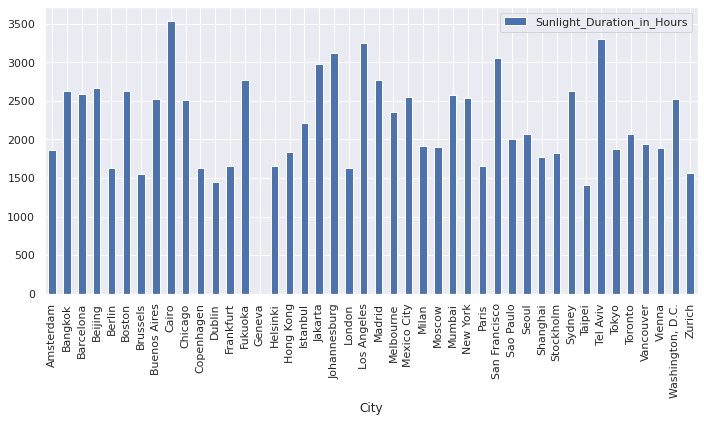

In [14]:
# Sunlight Duration in all country
data.groupby('City').agg(Sunlight_Duration_in_Hours= ('Sunshine hours(City)', 'sum')).plot.bar()

Cairo has the most duration of sunlight followed by Tel Aviv, and Los Angeles.

In [15]:
px.pie(data, values = 'Obesity levels(Country)', names = 'City', hole = 0.1, title = 'obesity in every city')

City with the highest percentage (3.75%) of obesity level is came from Los Angeles, Boston, Chicago, San Francisco, Washington D.C. and New York.

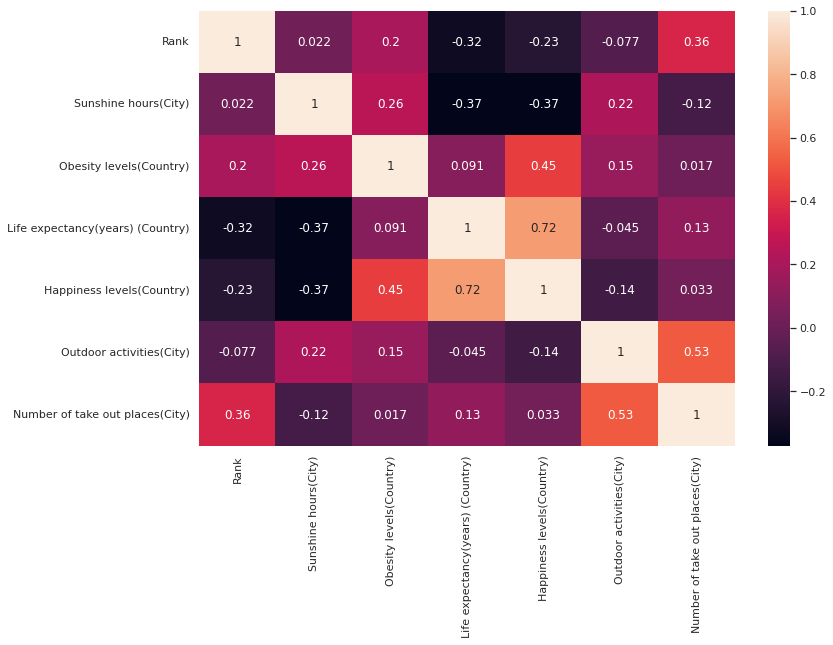

In [16]:
#plot korelasi metrik
plt.figure(figsize=(12, 8))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

Heatmap figure that show the correlation metrics of the "Healthy Lifestyle Cities Report 2021, 10 healthy living metrics in top 44 cities" datasets.